# Boston House Price Prediction

This project was started as a motivation for learning Machine Learning Algorithms and to learn the different data preprocessing techniques such as Exploratory Data Analysis, Feature Engineering, Feature Selection, Feature Scaling and finally to build a machine learning model.

In this project we will predicts house price in boston city

The dataset is collected from [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices/kernels). Let's get into the data and know more about it.

### Table of contents
1. Importing libraries
2. Exploratory Data Analysis
3. Feature Observation
4. Feature Importance Using `ExtraTreeRegressor`
5. Modeling <br>
5.1 Linear Regression <br>
5.2 Decision Tree Regressor <br>
5.3 Random Forest Regressor <br>

* For Model Evaluation we have calculated `model score` and `Testing and Training Accuracy`.
* We have optimized the Machine learning models by finding the optimal value of `Random State` and `depth_level`.

### 1. Importing Libraries

In [1]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style = 'whitegrid')

# For Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Initializing column names
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Loading Boston Housing Dataset
url = "/Users/adityaagarwal/Library/CloudStorage/OneDrive-NortheasternUniversity/Jupyter Notebook/Resume Projects/Boston Housing Price Prediction/data/housing.csv"
boston = pd.read_csv(url, delimiter=r"\s+", names = columns)
# Top 5 rows of the boston dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# TODO : Let's know how many factors of an individual and Number of Samples
print("The Boston housing Price Prediction Dataset has")
print("Number of Factors : \t", boston.shape[1] - 1)
print("Number of Samples : \t", boston.shape[0])

The Boston housing Price Prediction Dataset has
Number of Factors : 	 13
Number of Samples : 	 506


### 2. Exploratory Data Analysis

Let's Explore more on the data

In [4]:
# Descriptive Statistics on Boston Housing Dataset
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Check for null values and visualizing it using heatmap
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No null values in any of the column

In [6]:
# Let's check for data types of all the columns
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

All are numerical values. So no need of encoding

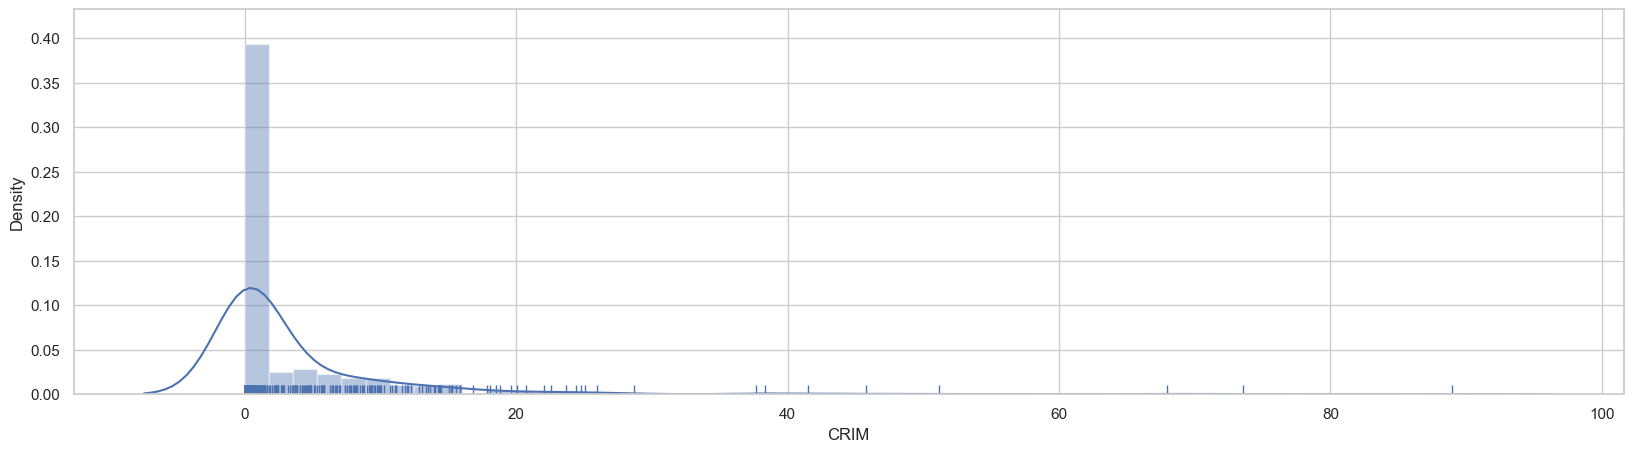

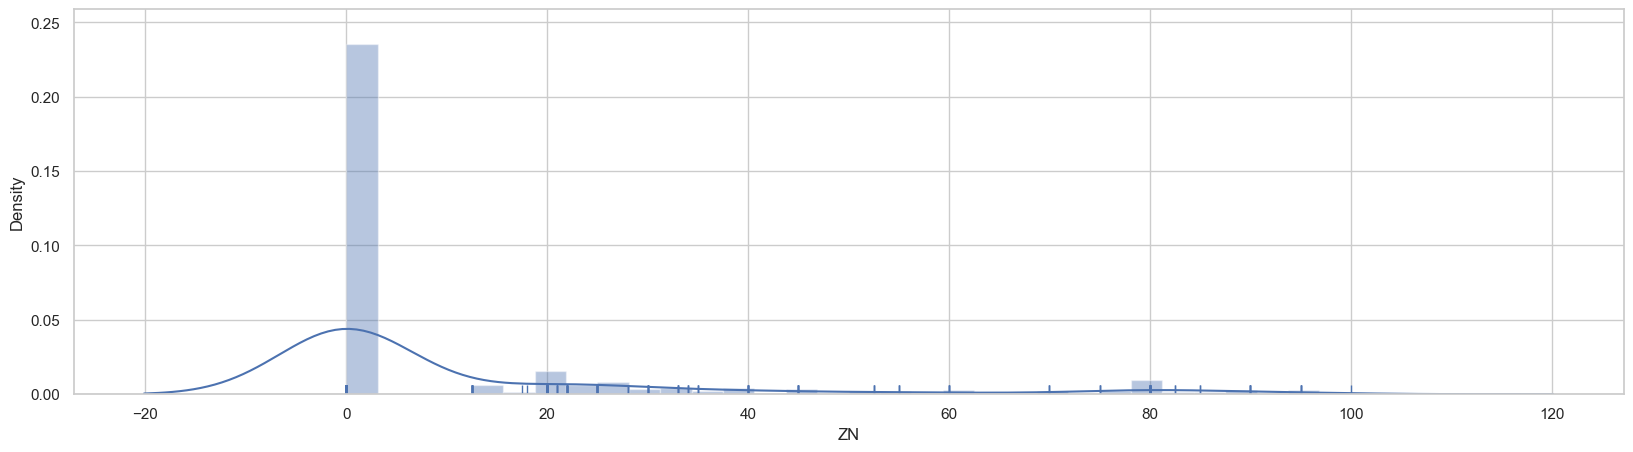

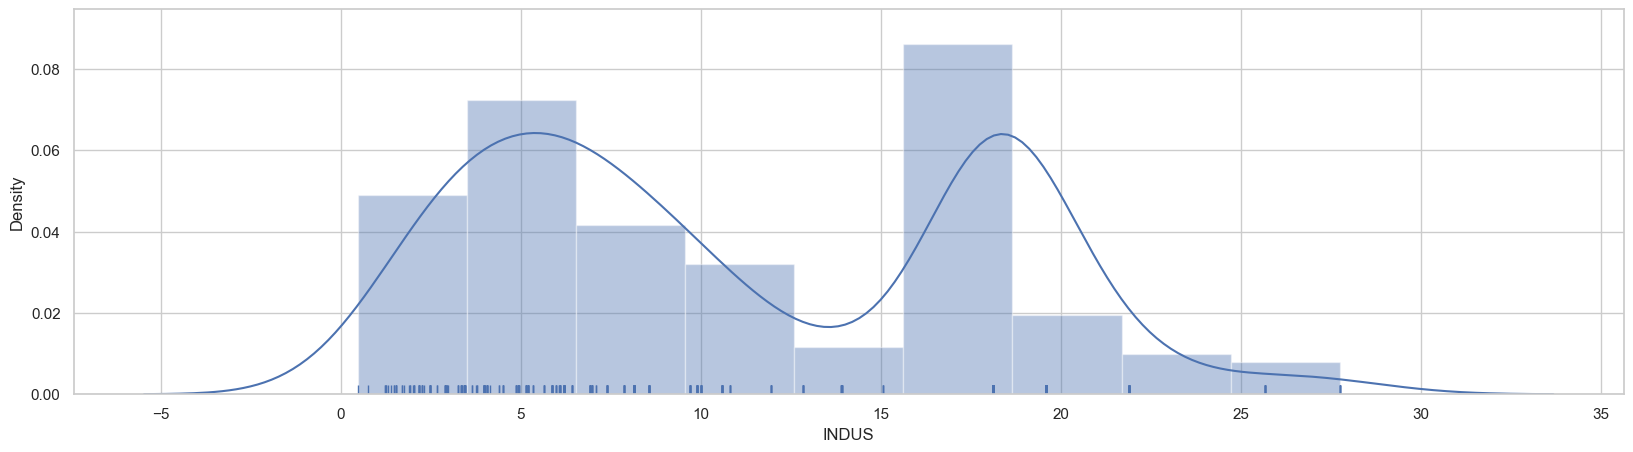

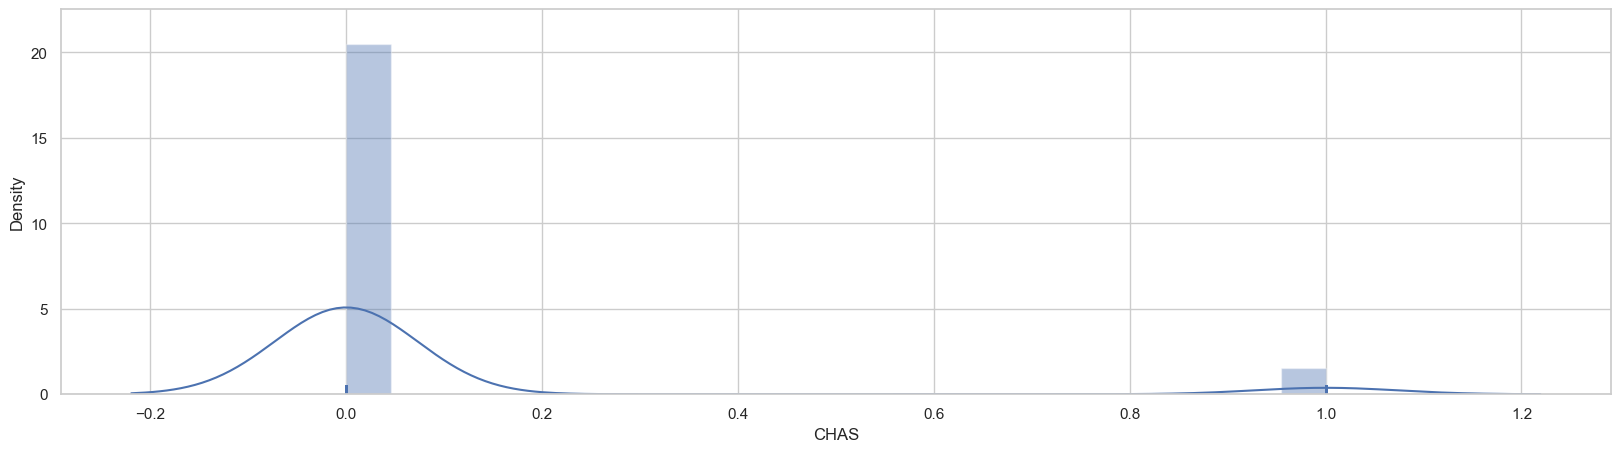

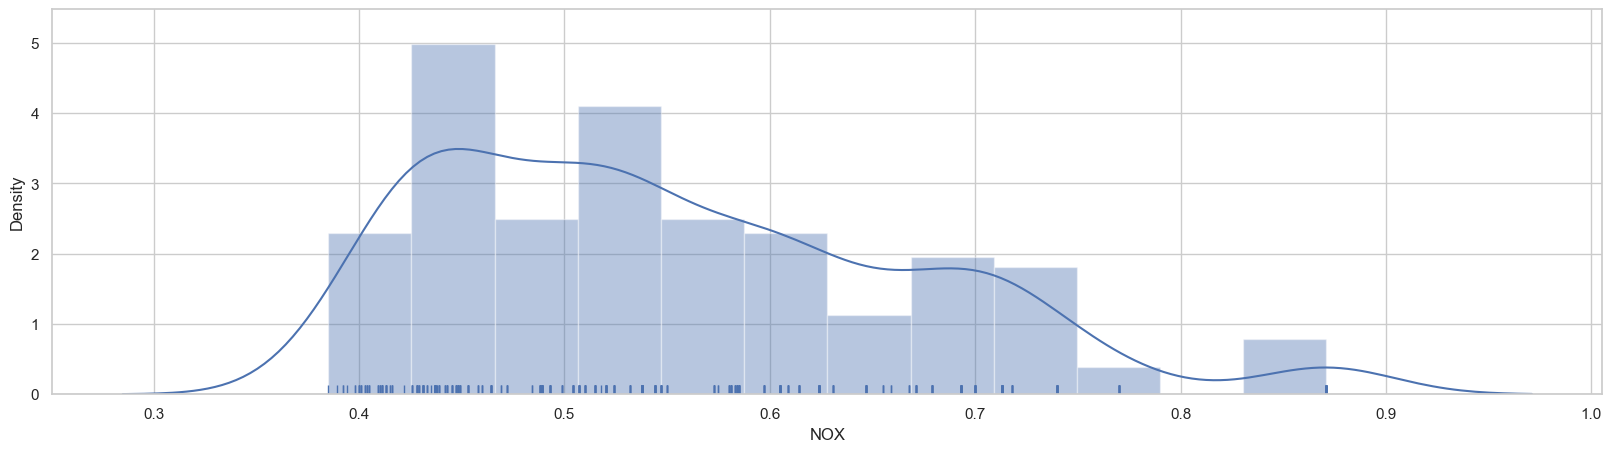

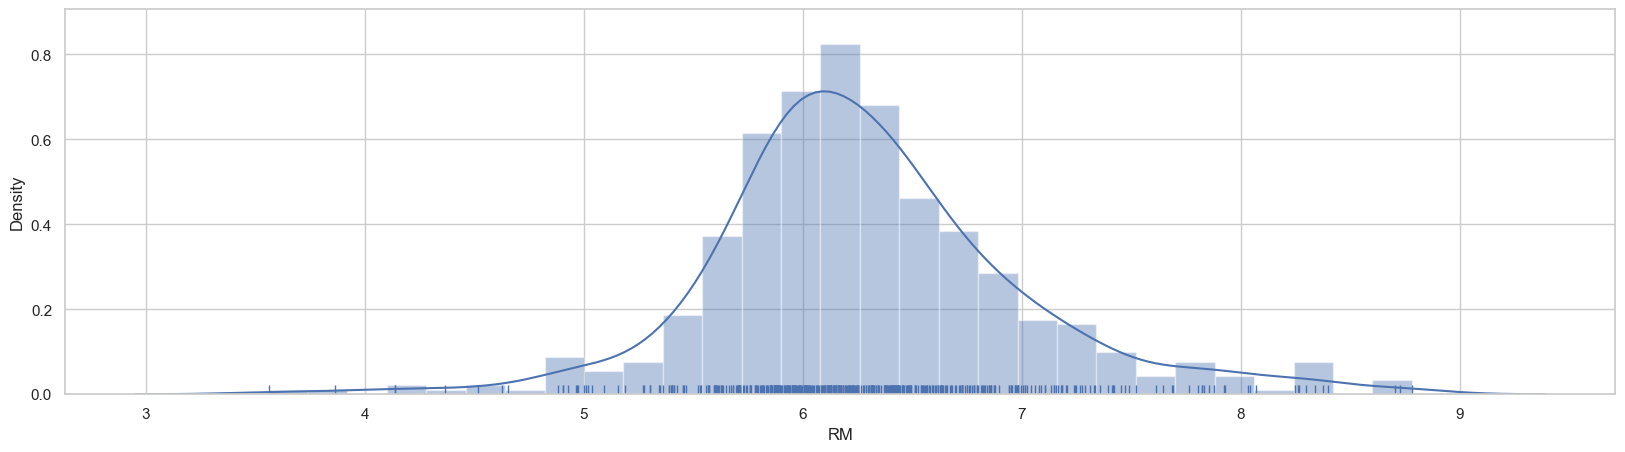

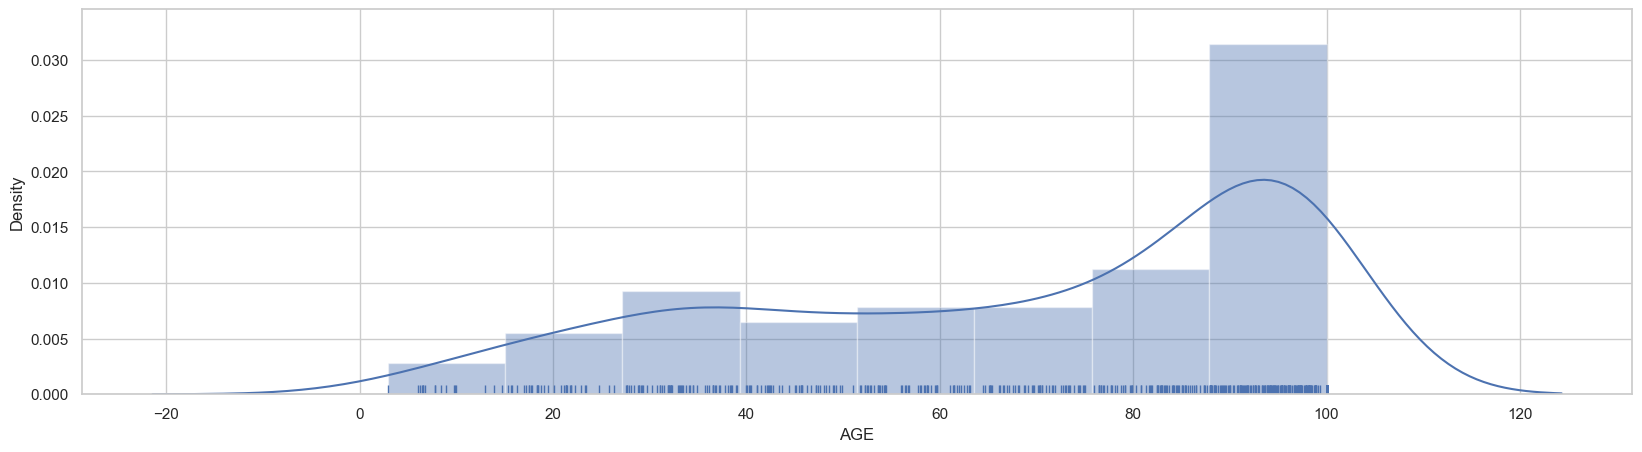

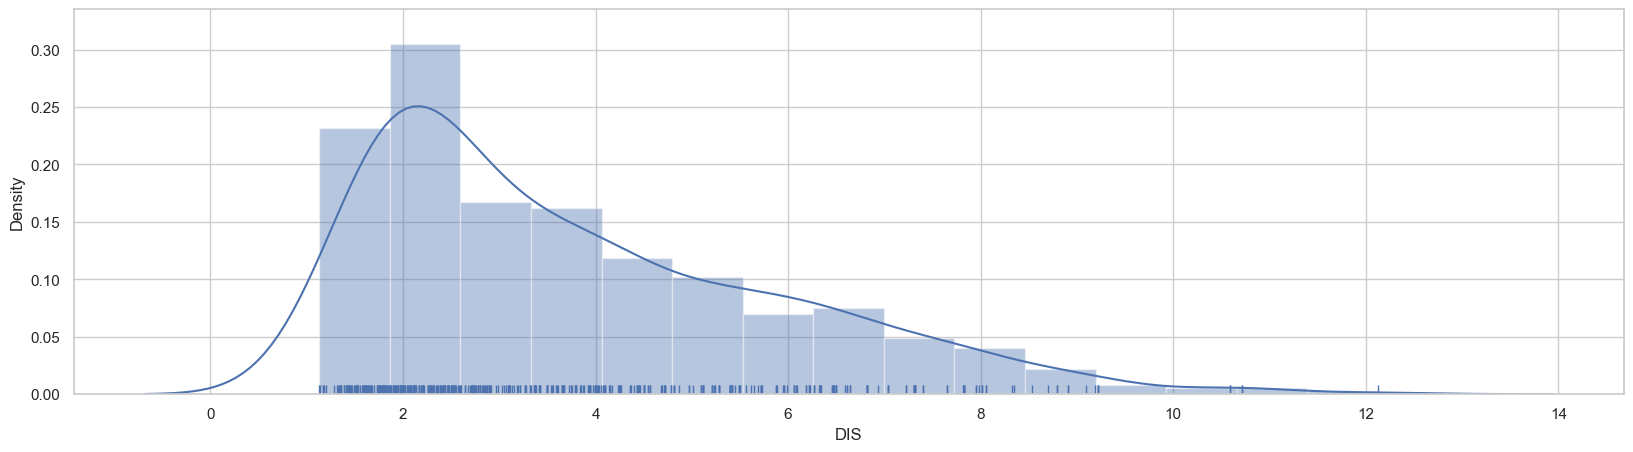

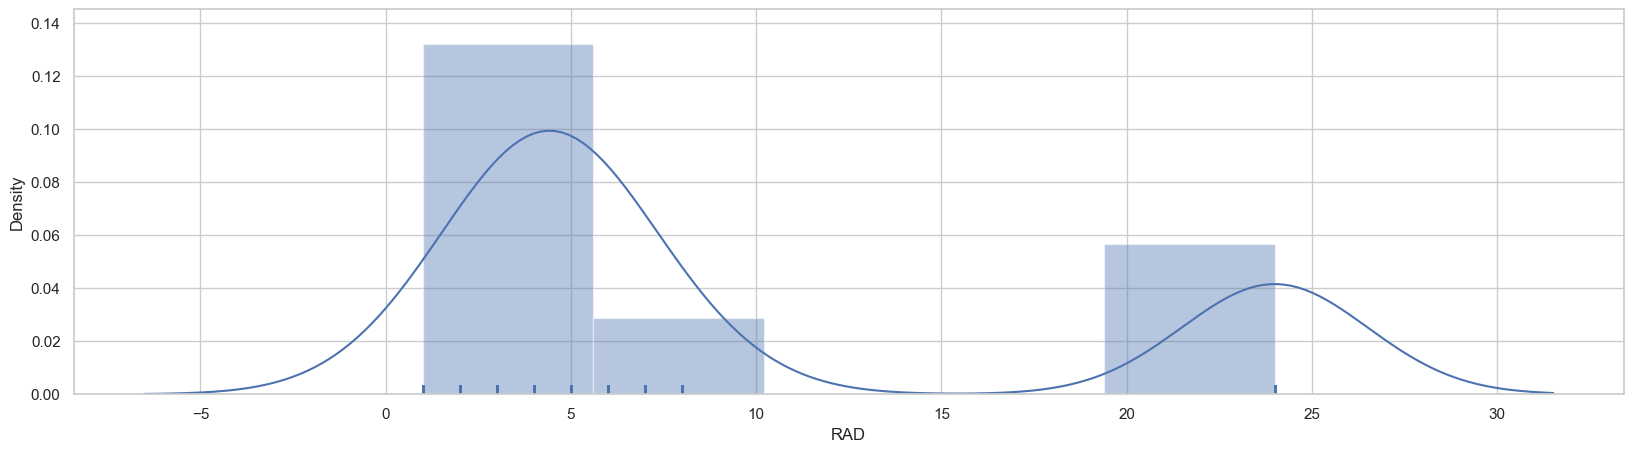

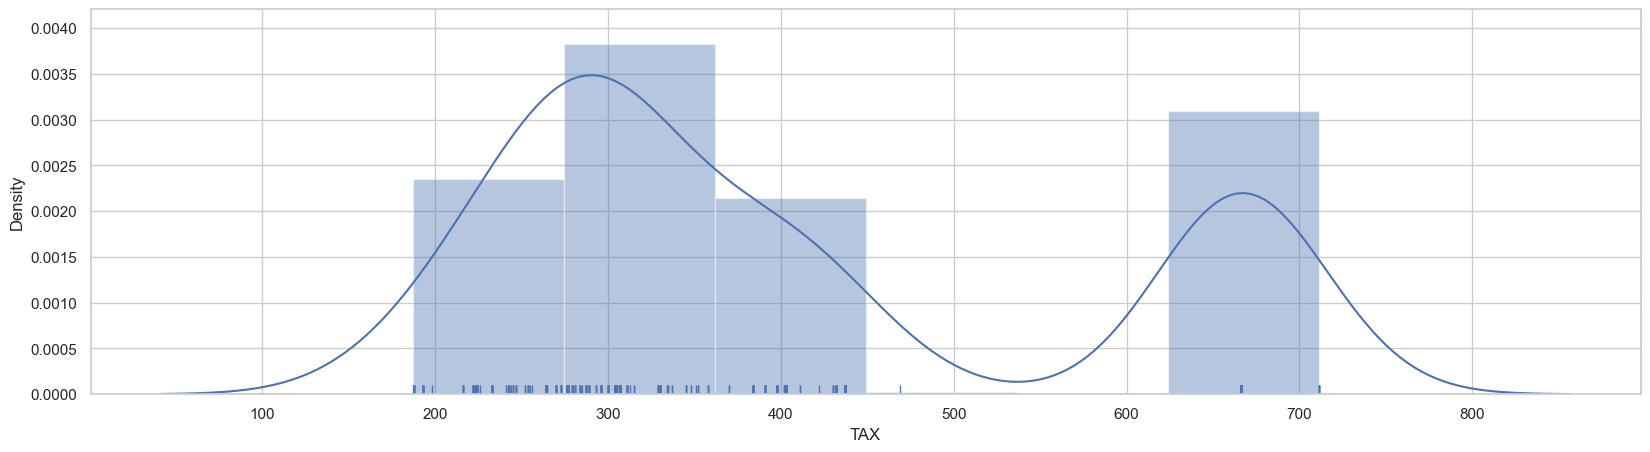

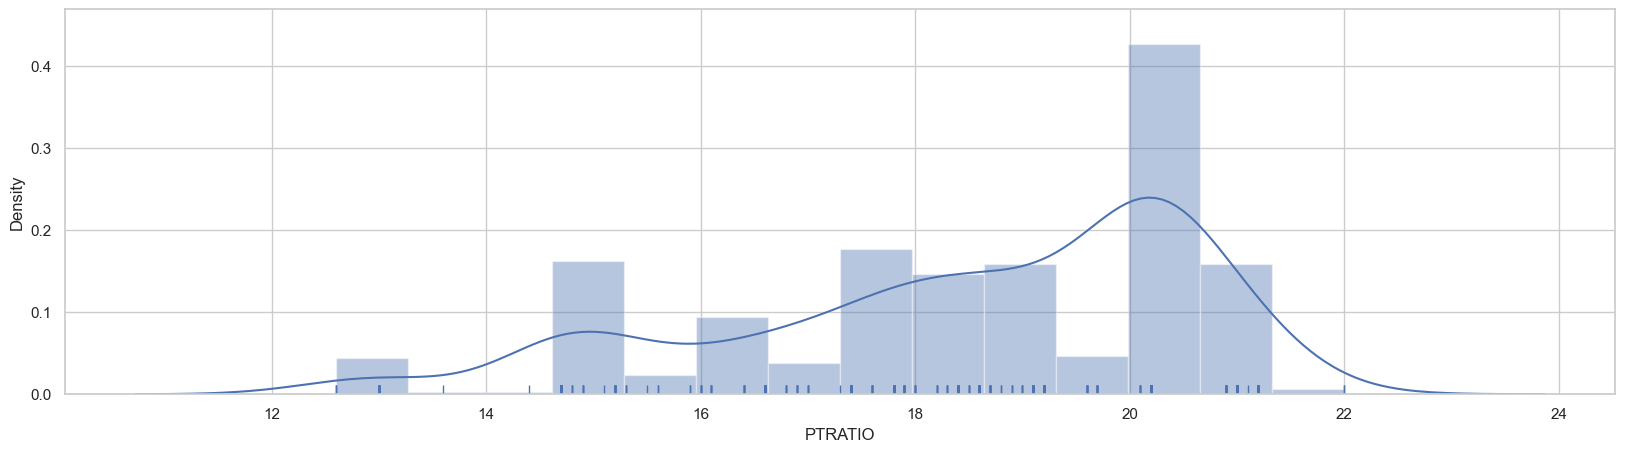

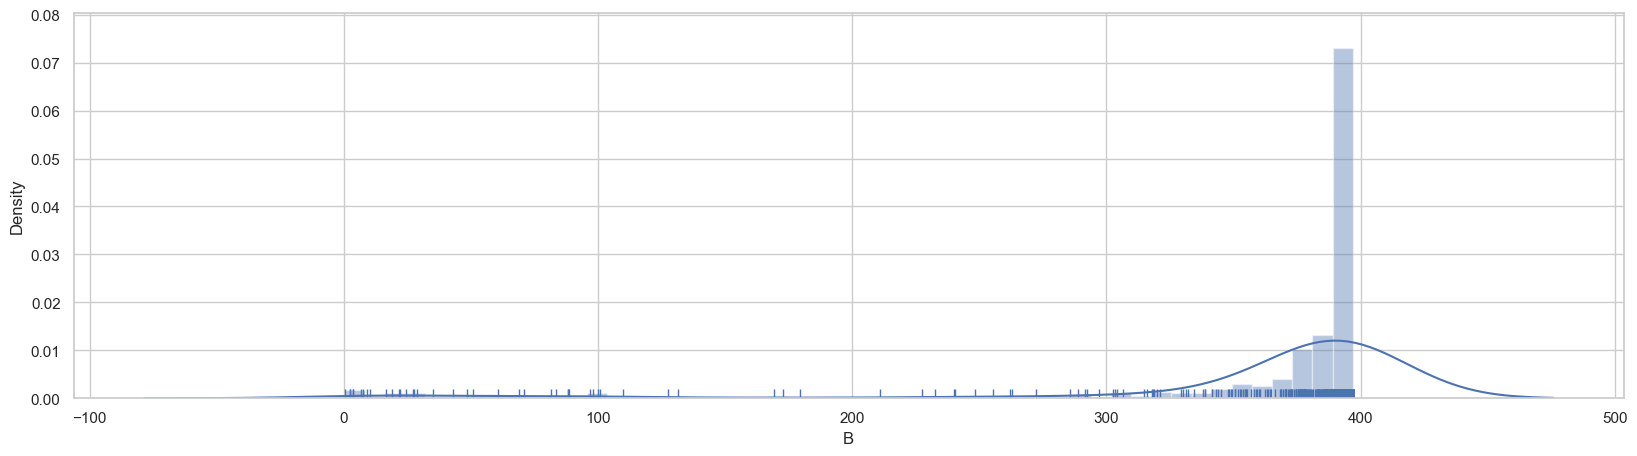

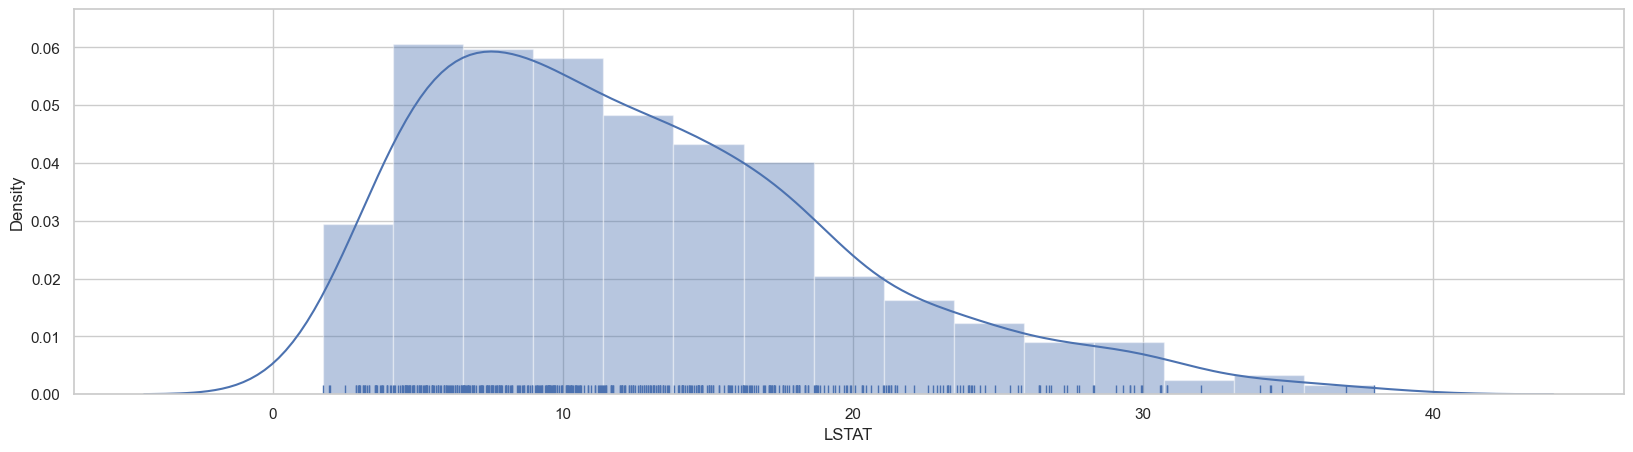

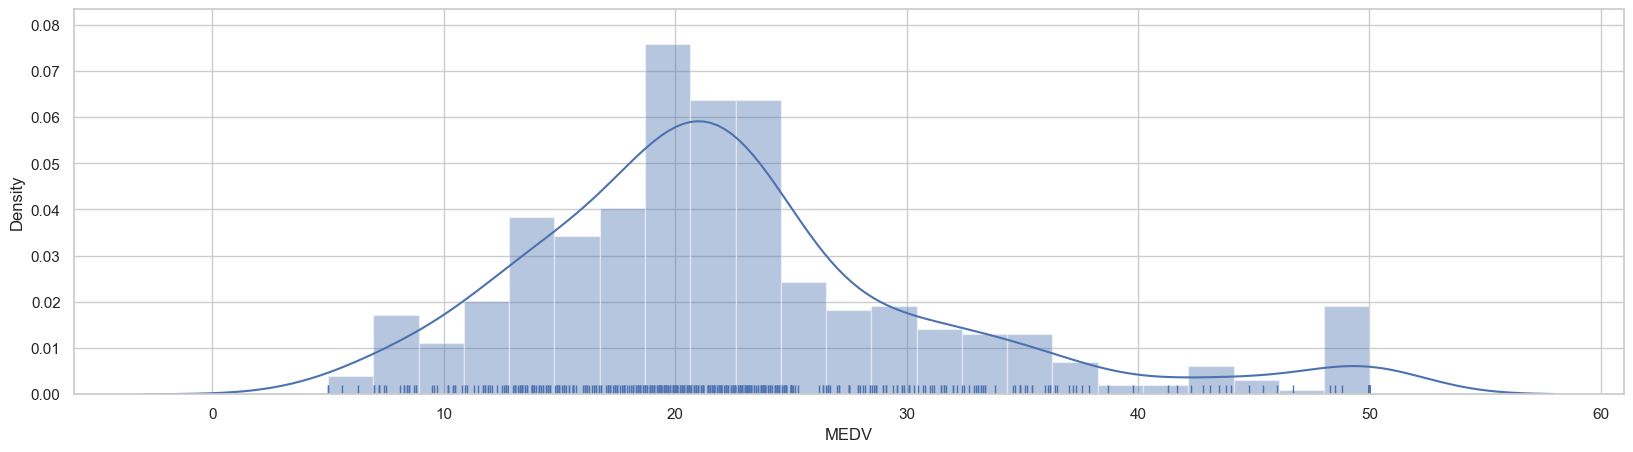

In [8]:
plt.figure(figsize=(20, 5))
sb.distplot(boston['CRIM'], rug = True)
plt.savefig('images/crim.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['ZN'], rug = True)
plt.savefig('images/zn.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['INDUS'], rug = True)
plt.savefig('images/indus.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['CHAS'], rug = True)
plt.savefig('images/chas.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['NOX'], rug = True)
plt.savefig('images/nox.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['RM'], rug = True)
plt.savefig('images/rm.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['AGE'], rug = True)
plt.savefig('images/age.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['DIS'], rug = True)
plt.savefig('images/dis.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['RAD'], rug = True)
plt.savefig('images/rad.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['TAX'], rug = True)
plt.savefig('images/tax.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['PTRATIO'], rug = True)
plt.savefig('images/ptration.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['B'], rug = True)
plt.savefig('images/b.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['LSTAT'], rug = True)
plt.savefig('images/lstat.png')

plt.figure(figsize=(20, 5))
sb.distplot(boston['MEDV'], rug = True)
plt.savefig('images/medv.png')

### 3. Feature Observation

<Figure size 200x200 with 0 Axes>

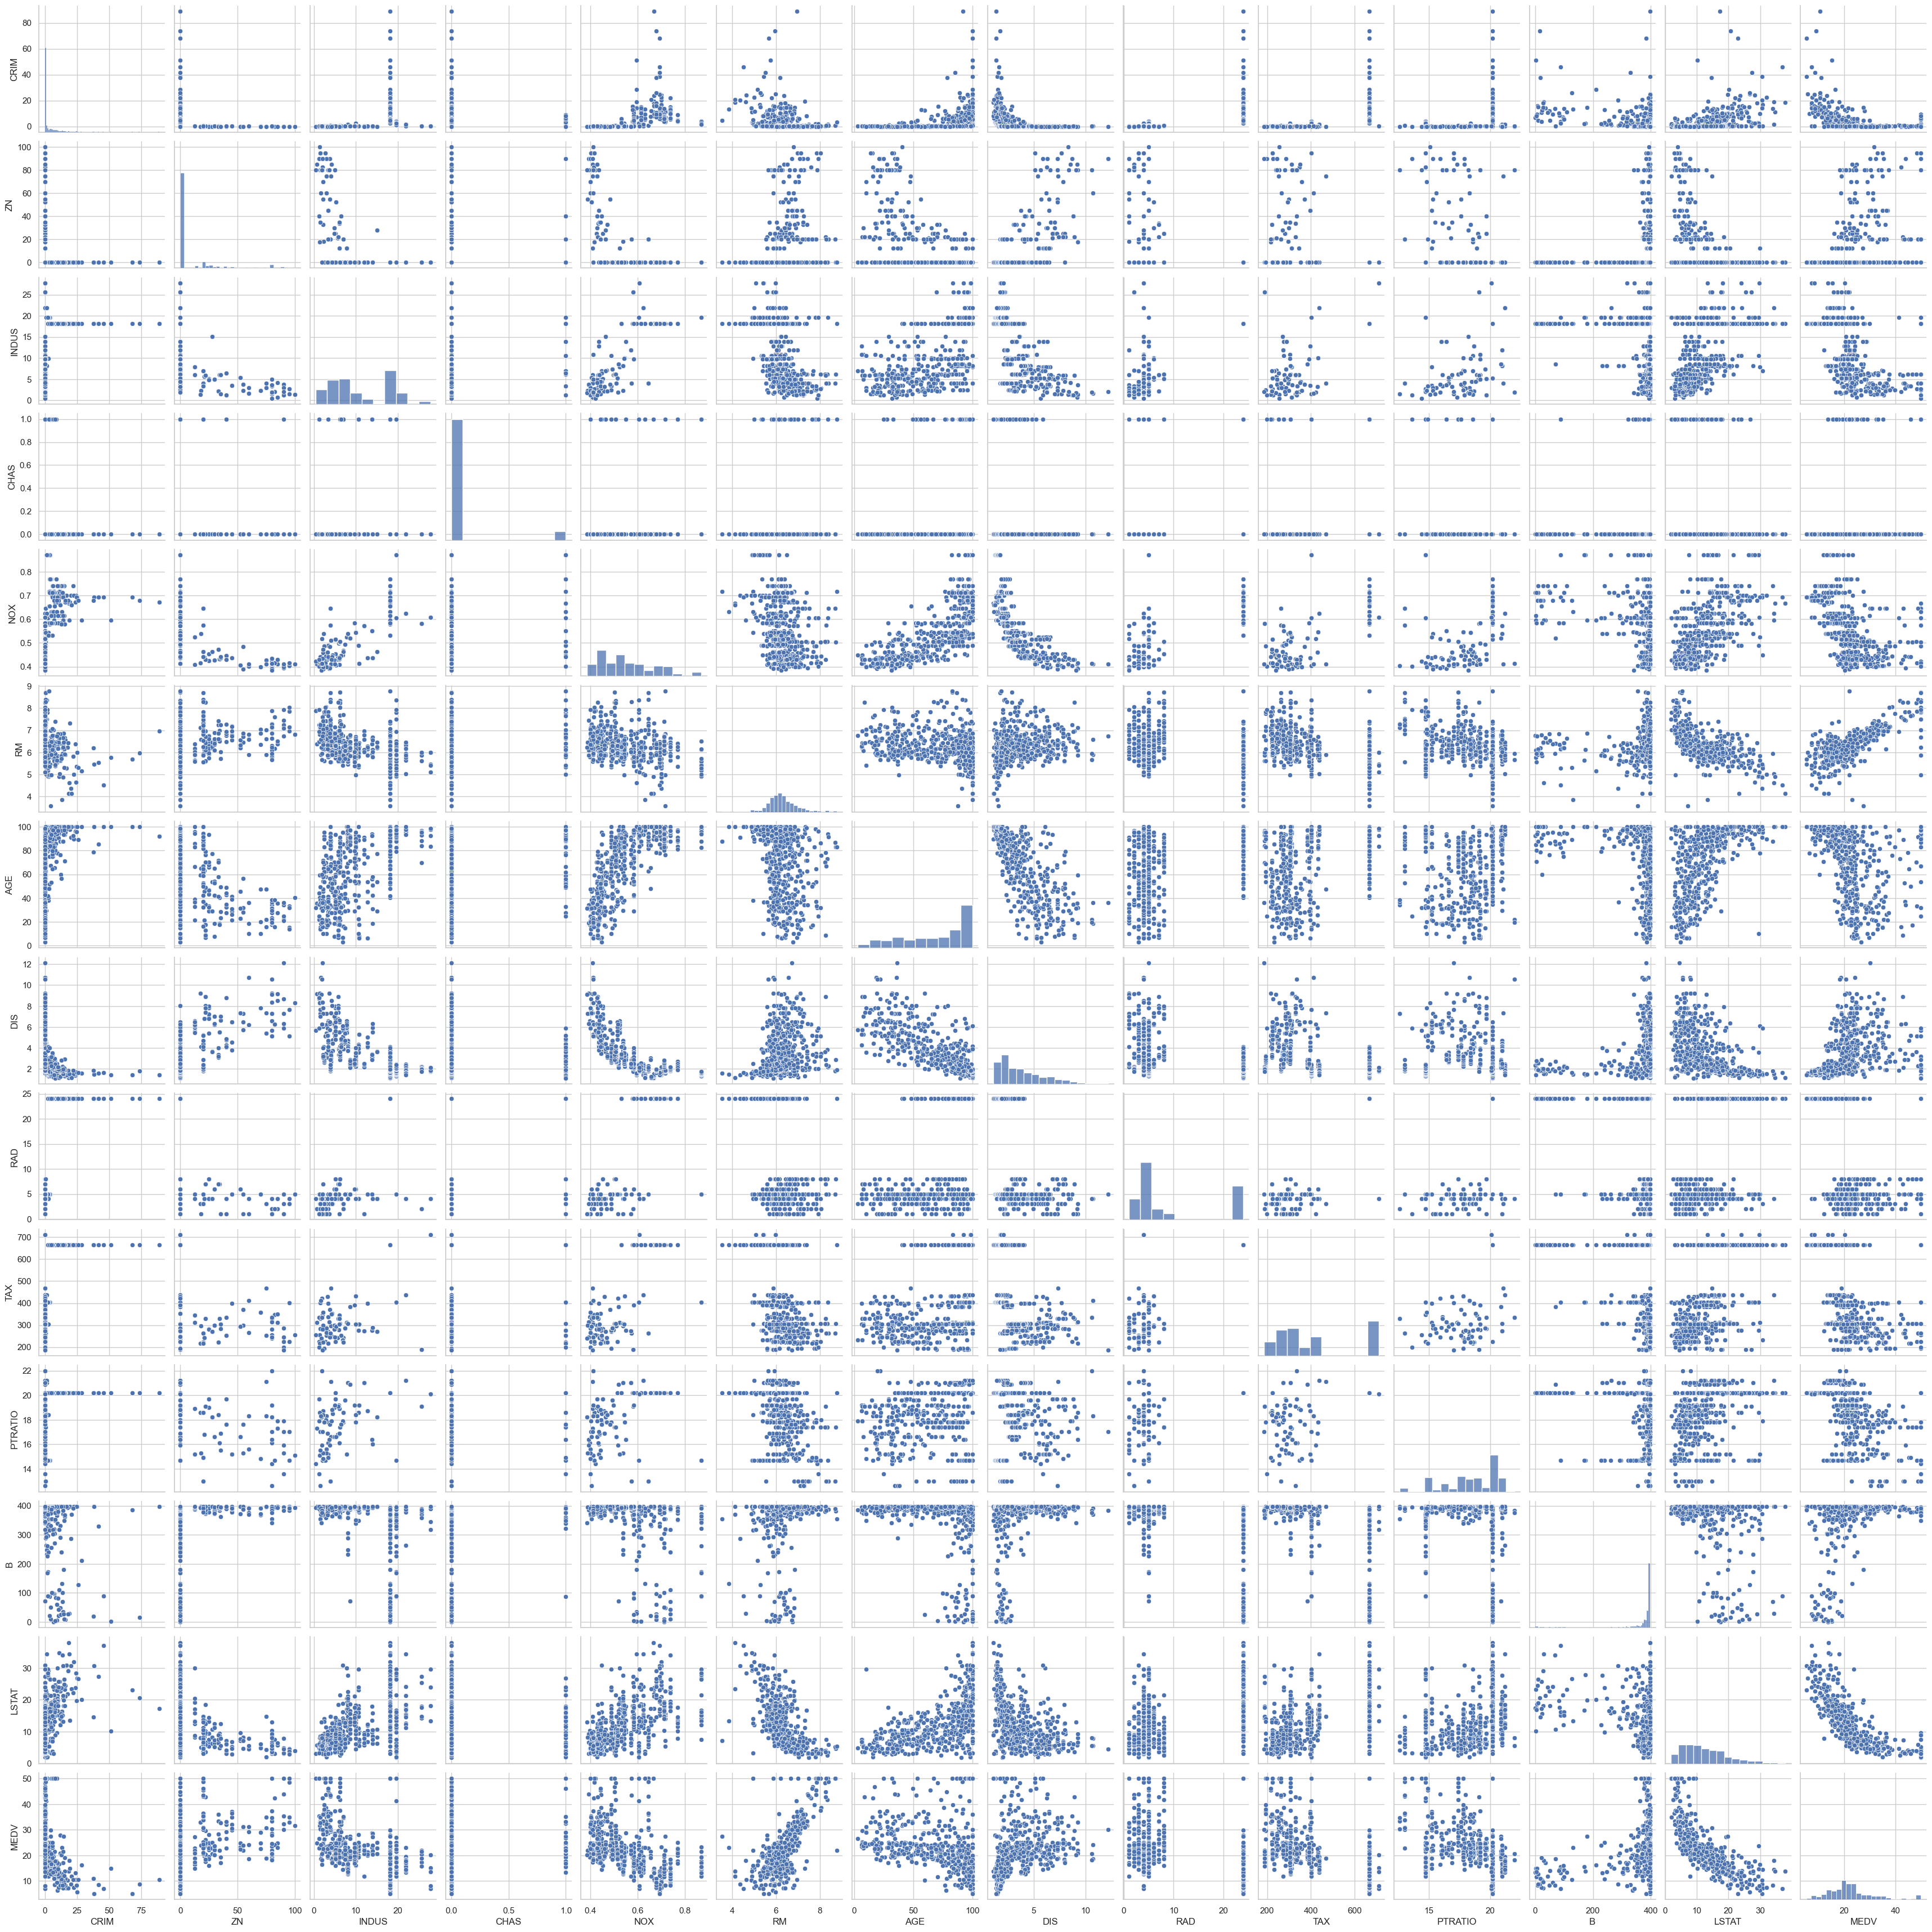

In [9]:
plt.figure(figsize  = (2, 2))
sb.pairplot(boston)
plt.savefig('images/pairplot.png')

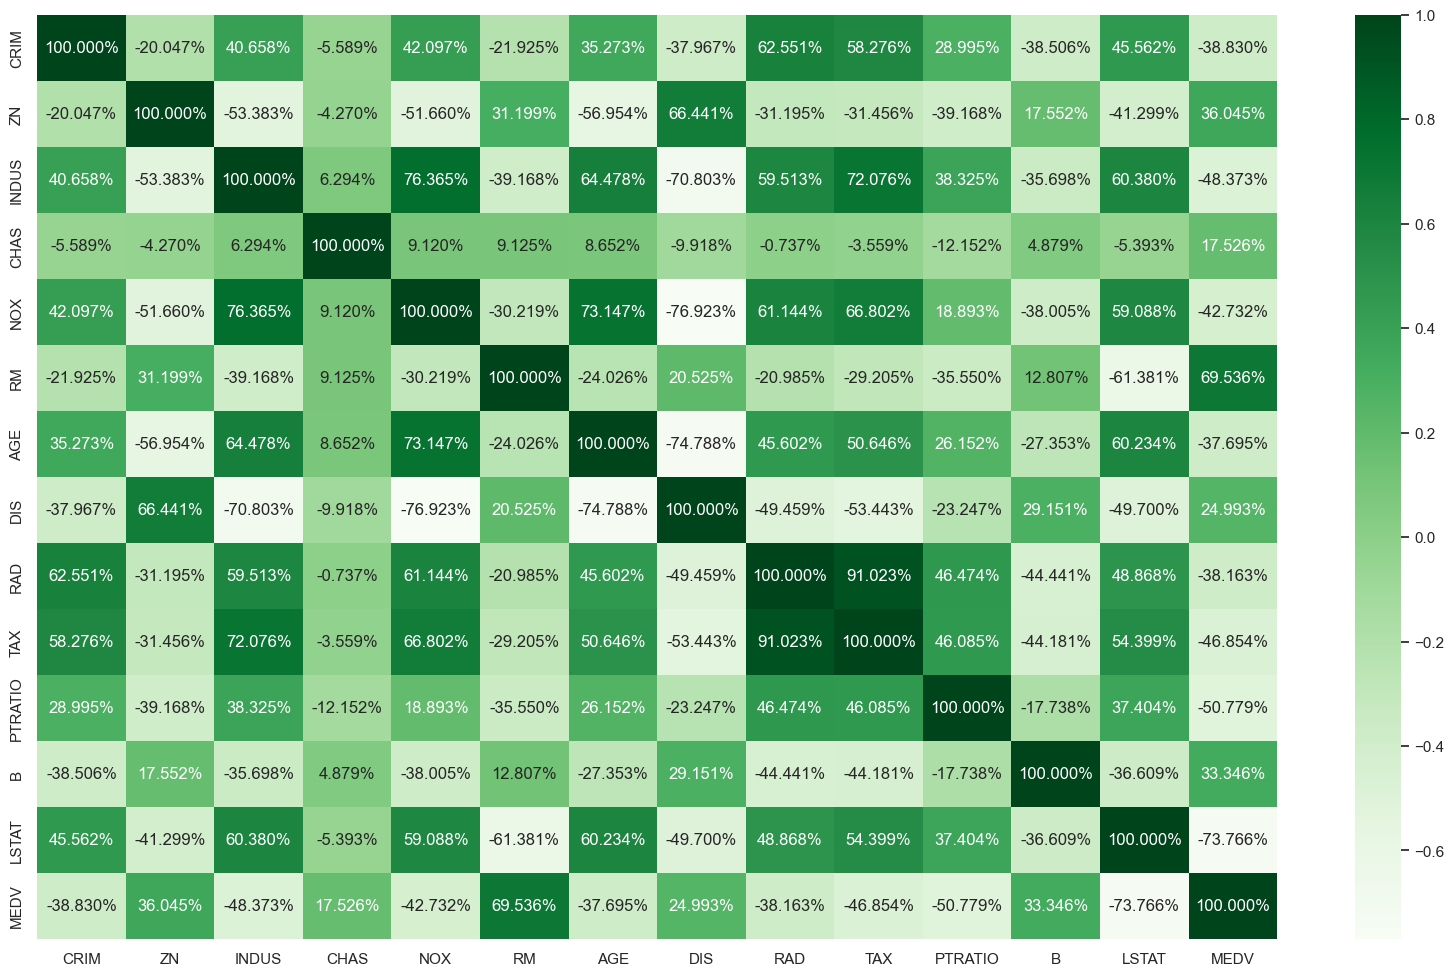

In [13]:
# Visualizing Feature Correlation 
plt.figure(figsize = (20, 12))
sb.heatmap(boston.corr(), cmap = 'Greens', annot = True, fmt = '.3%')
plt.savefig('images/features_correlation.png')

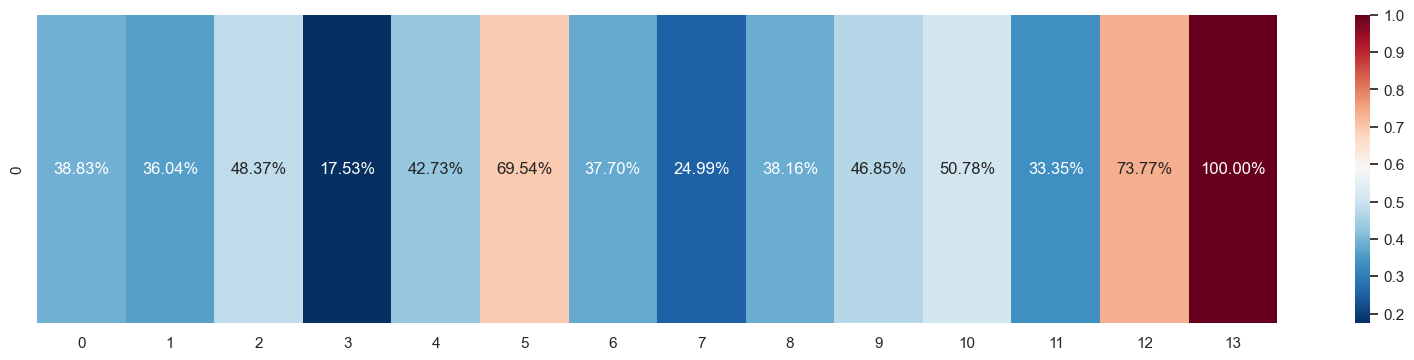

In [14]:
# Visualizing correlation of features with prediction column `MEDV`

corr_with_medv = boston.corrwith(boston['MEDV'])

plt.figure(figsize = (20, 4))
sb.heatmap([np.abs(corr_with_medv)], cmap = 'RdBu_r', annot = True, fmt = '.2%')
plt.savefig('images/correlation_with_price.png')

In [15]:
# Let's see the features having more correlation with the target (MEDV) variable
corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

### 4. Feature Importance using `ExtraTreesRegressor`

In [23]:
# Let's confirm this by using ExtraTreesRegressor - To know the feature Importances
y = boston['MEDV'].values
X = boston.drop(columns = 'MEDV', axis=1)

from sklearn.ensemble import ExtraTreesRegressor
etc = ExtraTreesRegressor()
etc.fit(X, y)              ## Fitting (x,y)

print("Percentage Importance of each features with respect to House Price : ")
important_features = pd.Series(etc.feature_importances_*100, index = boston.columns[:-1])
important_features.sort_values(ascending = False)

Percentage Importance of each features with respect to House Price : 


LSTAT      39.119237
RM         29.517719
PTRATIO     5.593115
TAX         4.522568
NOX         4.382109
INDUS       3.761871
CRIM        3.043908
DIS         2.856517
AGE         1.877282
B           1.848318
RAD         1.770920
CHAS        1.270492
ZN          0.435946
dtype: float64

In [99]:
# Feature Impotances by Correlation Matrix
corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

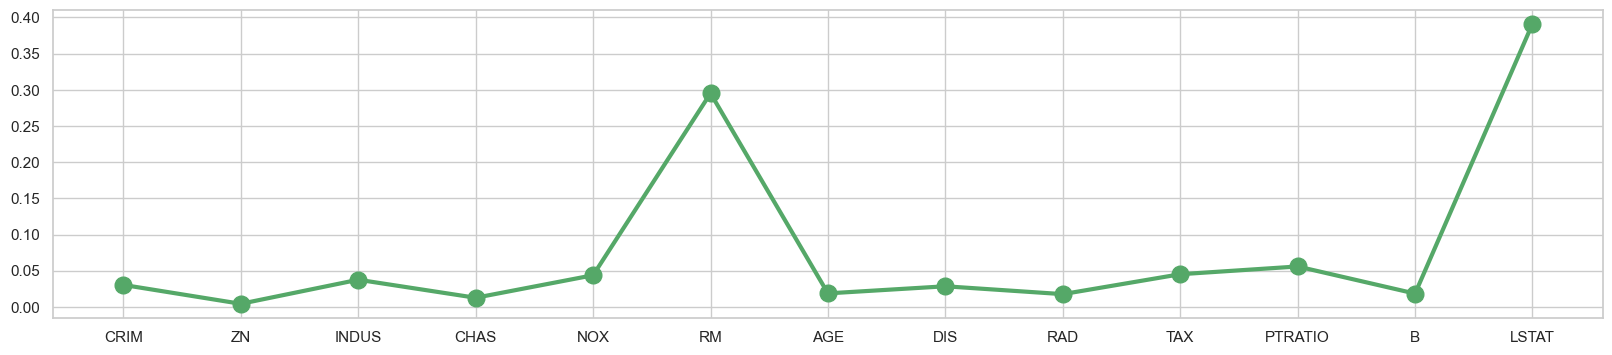

In [32]:
plt.figure(figsize=(20, 4))
plt.plot(boston.columns[:-1].values, etc.feature_importances_, 'go-', linewidth=3, markersize=12)
plt.savefig('images/feature_importances.png')

**NOTE** - From the above feature observations, we found that some columns are most important such as `LSTAT` and `RM`

### 5. Building Machine Learning Model

In [33]:
# Arranging features based on features importance
features_arranged_on_importance = important_features.sort_values(ascending = False).index
features_arranged_on_importance

Index(['LSTAT', 'RM', 'PTRATIO', 'TAX', 'NOX', 'INDUS', 'CRIM', 'DIS', 'AGE',
       'B', 'RAD', 'CHAS', 'ZN'],
      dtype='object')

In [34]:
y = boston.loc[:, 'MEDV'].values

In [35]:
# Arranging columns based on features importance
new_boston = boston[features_arranged_on_importance]
new_boston.head()

,LSTAT,RM,PTRATIO,TAX,NOX,INDUS,CRIM,DIS,AGE,B,RAD,CHAS,ZN
0,4.98,6.575,15.3,296.0,0.538,2.31,0.00632,4.0900,65.2,396.90,1,0,18.0
1,9.14,6.421,17.8,242.0,0.469,7.07,0.02731,4.9671,78.9,396.90,2,0,0.0
2,4.03,7.185,17.8,242.0,0.469,7.07,0.02729,4.9671,61.1,392.83,2,0,0.0
3,2.94,6.998,18.7,222.0,0.458,2.18,0.03237,6.0622,45.8,394.63,3,0,0.0
4,5.33,7.147,18.7,222.0,0.458,2.18,0.06905,6.0622,54.2,396.90,3,0,0.0


In [63]:
# Getting boston values
X = new_boston.values
X = X[:, :6]                ## selecting top 6 columns with feature importance value greater than 3.47

# TODO : Splitting data as train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 5.1 Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train)*100)
print('Testing Score  : ', linear_model.score(X_test, y_test)*100)

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  69.06984575653775
Testing Score  :  62.095483780984026
R2 Score :  0.6209548378098403
MSE :  27.79681573202262


In [78]:
### Applying min-max scaler to check if the score increases or not - 

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

linear_model = make_pipeline(MinMaxScaler(), LinearRegression())
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train)*100)
print('Testing Score  : ', linear_model.score(X_test, y_test)*100)

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  69.06984575653775
Testing Score  :  62.09548378098446
R2 Score :  0.6209548378098446
MSE :  27.7968157320223


#### 5.2 Decision Tree Regression

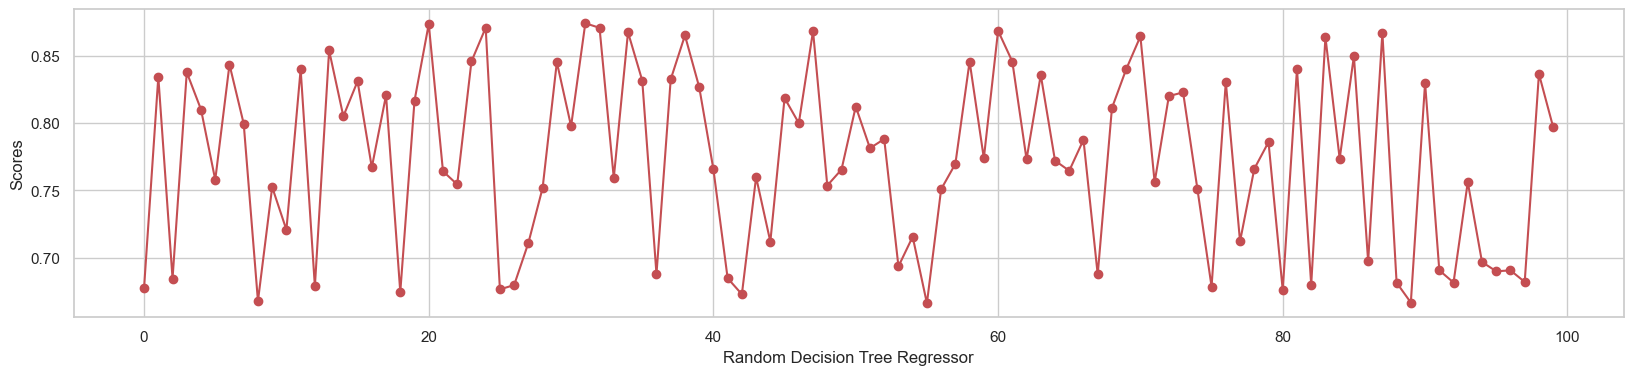

In [73]:
from sklearn.tree import DecisionTreeRegressor
scores = []
for i in range(100):
    dtr_model = DecisionTreeRegressor(max_depth=None, random_state=i)
    dtr_model.fit(X_train, y_train)
    scores.append(r2_score(y_test, dtr_model.predict(X_test)))

plt.figure(figsize = (20, 4))
plt.plot(tuple(range(100)), scores, 'ro-')
plt.xlabel('Random Decision Tree Regressor')
plt.ylabel('Scores')
plt.savefig('images/random_decision_tree_regressor.png')
plt.show()

**NOTE** - See how the decision tree score changes for different random states

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

dtr_model = DecisionTreeRegressor(max_depth=23, random_state=3)
dtr_model.fit(X_train, y_train)
    
print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))

Training Score :  1.0
Testing Score  :  0.8375197132323347
R2 Score :  0.8375197132323347
MSE :  11.915294117647058


In [85]:
### After scaling the dataset, we have applied Decision trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

adtr_model = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth = 12, random_state = 21))
adtr_model.fit(X_train, y_train)

print('Training Score : ', adtr_model.score(X_train, y_train))
print('Testing Score  : ', adtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, adtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, adtr_model.predict(X_test)))

Training Score :  0.9960886512531352
Testing Score  :  0.8569213619835332
R2 Score :  0.8569213619835332
MSE :  10.492497815173921


#### 5.3 Random Forest Regression

In [87]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21)
rfr = RandomForestRegressor(max_depth = 7, random_state = 63)
rfr.fit(X_train, y_train)

print('Training Score : ', rfr.score(X_train, y_train))
print('Testing Score  : ', rfr.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, rfr.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, rfr.predict(X_test)))

Training Score :  0.955271676115495
Testing Score  :  0.8620849286707613
R2 Score :  0.8620849286707613
MSE :  12.978252021826473


#### 5.3.1 Building optimal Random Regression Model

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 21)

print('Random Forest Regression - ')
random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 21)
random_forest_regressor.fit(X_train, y_train)

print('Training Score : ', random_forest_regressor.score(X_train, y_train))
print('Testing Score  : ', random_forest_regressor.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, random_forest_regressor.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test)))

Random Forest Regression - 
Training Score :  0.954256050088552
Testing Score  :  0.8579243577681047
R2 Score :  0.8579243577681047
MSE :  13.369775132454825


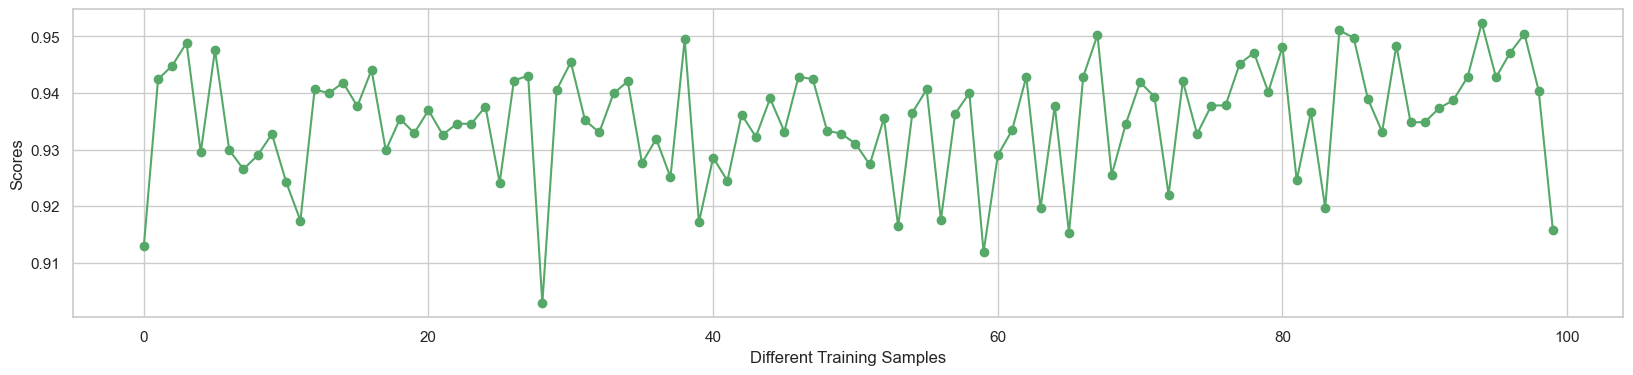

In [95]:
# Scores for different training samples in `train_test_split`
scores = []
for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
    random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 21)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (20, 4))
plt.plot(scores, 'go-')
plt.xlabel('Different Training Samples')
plt.ylabel('Scores')
plt.savefig('images/random_forest_diff_train_samples.png')
plt.show()

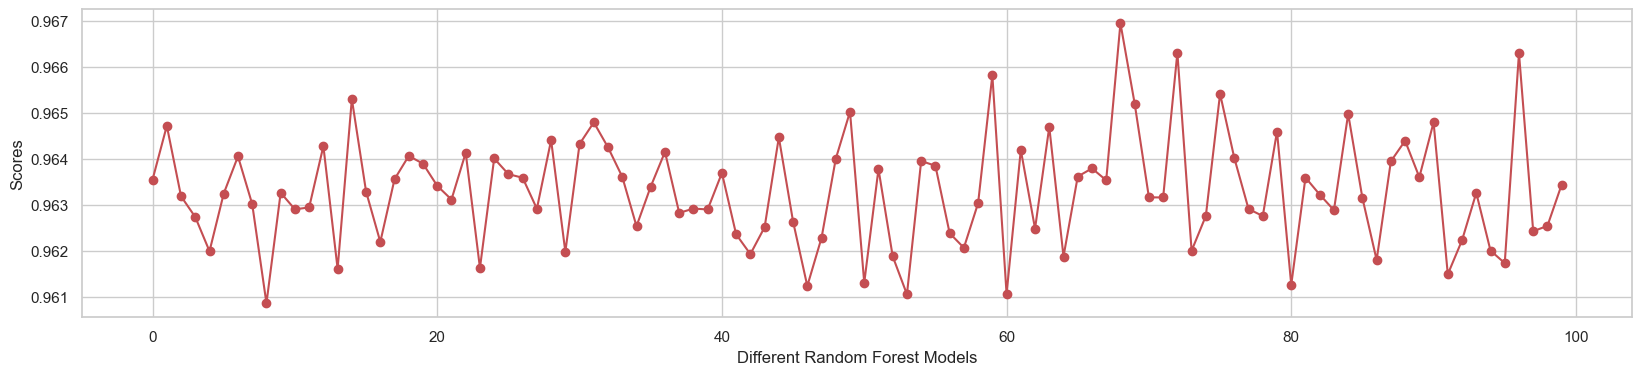

In [101]:
# Scores for different random state in `random forest model``
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(100):
    random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = i)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (20, 4))
plt.plot(scores, 'ro-')
plt.xlabel('Different Random Forest Models')
plt.ylabel('Scores')
plt.savefig('images/random_forest_diff_RF_models.png')
plt.show()

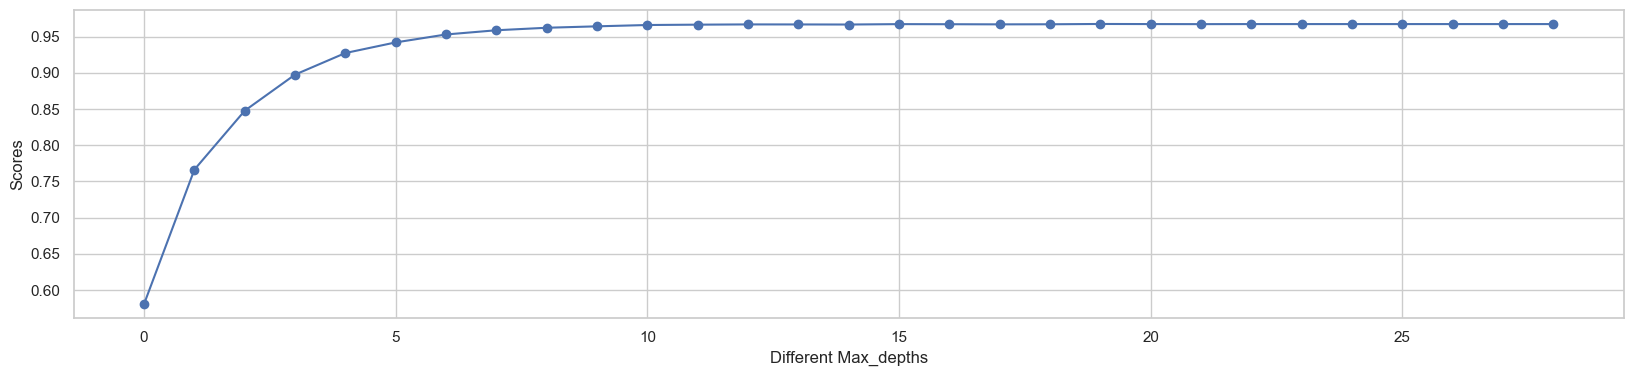

In [102]:
# Scores for different DEPTH in `random forest model`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(1, 30):
    random_forest_regressor = RandomForestRegressor(max_depth = i, random_state = 68)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (20, 4))
plt.plot(scores, 'bo-')
plt.xlabel('Different Max_depths')
plt.ylabel('Scores')
plt.savefig('images/random_forest_diff_max_depth.png')
plt.show()

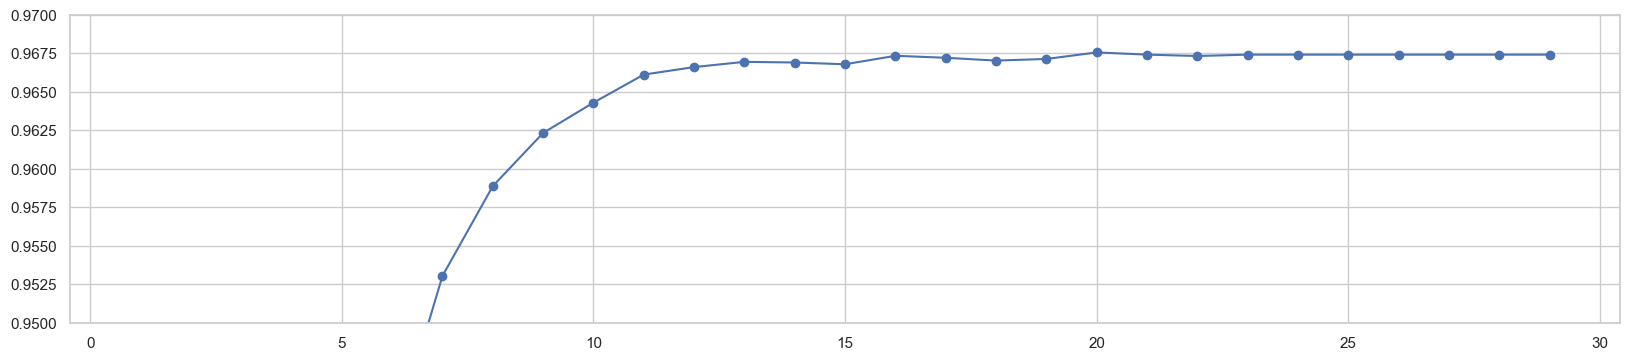

In [103]:
plt.figure(figsize = (20, 4))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.ylim(0.95, 0.97)
plt.show()

From this, we are going to choose,
- random_state = 3, for choosing random Training samples
- random_state = 68, for random Random forest regressor
- max_depth = 13, for Max Depths in random forest regressor

#### 5.3.2 Building Optimal `Random Forest Model`

In [104]:
# Choosing Optimal Training Samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

# Building Optimal Random Forest regressor Model
random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = 68)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, random_state=68)

In [105]:
print("Random forest regressor Score : ", random_forest_regressor.score(X, y))
print('Training Accuracy : ', random_forest_regressor.score(X_train, y_train))
print('Testing Accuracy  : ', random_forest_regressor.score(X_test, y_test))

Random forest regressor Score :  0.9669458989034811
Training Accuracy :  0.9787454200209023
Testing Accuracy  :  0.9189973669723589


In [106]:
print('Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test)))
print('Root Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test))**0.5)
print('Score : ', r2_score(y, random_forest_regressor.predict(X)))

Mean Squared Error :  6.703356935476015
Root Mean Squared Error :  2.589084188564755
Score :  0.9669458989034811


Finally we finishes the project. We have built a Random Forest Regressor Model which performs well with top 6 features and having the Training accuracy of 97.89% and Testing accuracy of 96.73%.

#### Different Models Accuracy

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

print('Linear Regression : ')
model1 = LinearRegression()
model1.fit(X_train, y_train)
print('Score : ', model1.score(X_test, y_test))

print('Decision Tree Regression : ')
model2 = DecisionTreeRegressor(max_depth=23, random_state=3)
model2.fit(X_train, y_train)
print('Score : ', model2.score(X_test, y_test))

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))

print('k Neighbors Regression : ')
model4 = KNeighborsRegressor(n_neighbors = 10)
model4.fit(X_train, y_train)
print('Score : ', model4.score(X_test, y_test))

Linear Regression : 
Score :  0.6209548378098403
Decision Tree Regression : 
Score :  0.8375197132323347
Random Forest Regression : 
Score :  0.8556792884287502
k Neighbors Regression : 
Score :  0.6094868472810563
